In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Accessing Files
data_path = "/content/drive/My Drive/data/chest-xray-pneumonia"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Unzip Dataset**

In [2]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/My Drive/data/chest-xray-pneumonia.zip'

# Create a ZipFile object
zip_ref = zipfile.ZipFile(zip_file_path)

# Extract the contents of the zip file to a specified directory
zip_ref.extractall('/content')

# Close the ZipFile object
zip_ref.close()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout, MaxPooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
import cv2

In [5]:
DIRECTORY = r'/content/chest_xray/chest_xray'
FOLDERS = ['test','train', 'val']
CLASS = ['NORMAL','PNEUMONIA']


In [6]:
test_data = []
train_data = []
val_data  = []

for folder in FOLDERS:
  folder_path = os.path.join(DIRECTORY, folder)
  for classification in CLASS:
    image_path = os.path.join(folder_path, classification)
    for image in os.listdir(image_path):
      try:
        image_url = os.path.join(image_path, image)
        arr = cv2.imread(image_url)
        arr = cv2.resize(arr, (100, 100))
        label = CLASS.index(classification)
        if folder == 'train':
          train_data.append([arr, label])
        elif folder == 'test':
          test_data.append([arr, label])
        else:
          val_data.append([arr, label])

      except Exception as e:
        print(e)

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [7]:
print(len(train_data))
print(len(test_data))
print(len(val_data))

5216
624
16


In [8]:

import random
random.shuffle(train_data)

**Seperating Dependent and Independent features**

In [9]:
X = []
y = []

for feature, label in train_data:
  X.append(feature)
  y.append(label)

In [10]:
X = np.array(X)
y = np.array(y)

In [11]:
X.shape

(5216, 100, 100, 3)

In [12]:
y.shape

(5216,)

In [13]:
X = X.reshape(-1,100,100,3)

# X = np.expand_dims(X, axis=1)

In [14]:
X.shape

(5216, 100, 100, 3)

**Normalization**

In [15]:
X = X/255

In [16]:
X.shape

(5216, 100, 100, 3)

In [17]:
X.shape[1:]


(100, 100, 3)

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()

# layer1
model.add(Conv2D(100, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

# layer2
model.add(Conv2D(100,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

# layer3
model.add(Conv2D(100,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

# layer4
model.add(Conv2D(100,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

#Flatten
model.add(Flatten())

# Dense Layer
model.add(Dense(256,  activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(2, activation='sigmoid'))

model.compile(
              loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

# # Print model summary
# model.summary()


**Compile Model**

In [19]:
r = model.fit(X, y, epochs=10, batch_size=30, validation_split=0.2)

Epoch 1/10
140/140 [==============================] - 14s 42ms/step - loss: 0.5350 - accuracy: 0.7541 - val_loss: 0.3767 - val_accuracy: 0.7941
Epoch 2/10
140/140 [==============================] - 4s 31ms/step - loss: 0.2741 - accuracy: 0.8861 - val_loss: 0.3358 - val_accuracy: 0.8391
Epoch 3/10
140/140 [==============================] - 4s 30ms/step - loss: 0.1777 - accuracy: 0.9343 - val_loss: 0.1851 - val_accuracy: 0.9243
Epoch 4/10
140/140 [==============================] - 4s 31ms/step - loss: 0.1452 - accuracy: 0.9451 - val_loss: 0.1737 - val_accuracy: 0.9358
Epoch 5/10
140/140 [==============================] - 4s 31ms/step - loss: 0.1300 - accuracy: 0.9504 - val_loss: 0.1231 - val_accuracy: 0.9607
Epoch 6/10
140/140 [==============================] - 4s 30ms/step - loss: 0.1170 - accuracy: 0.9571 - val_loss: 0.1070 - val_accuracy: 0.9741
Epoch 7/10
140/140 [==============================] - 4s 31ms/step - loss: 0.1030 - accuracy: 0.9621 - val_loss: 0.1210 - val_accuracy: 0.958

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

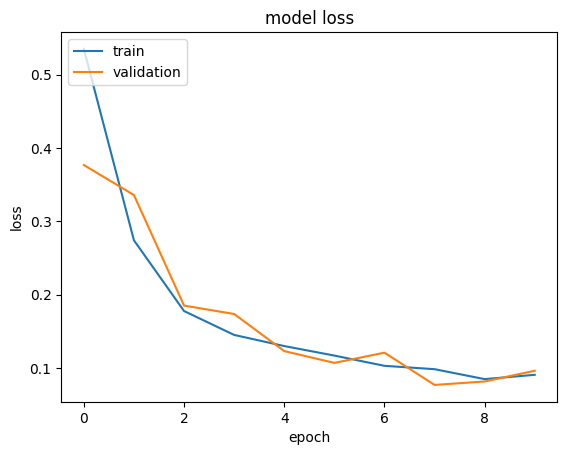

In [21]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Accuracy Graph**

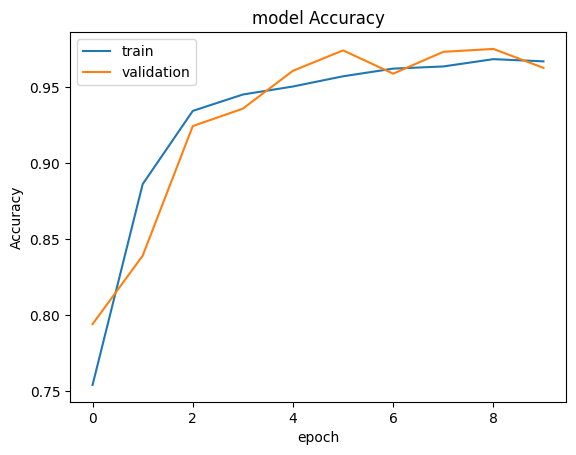

In [22]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
from tensorflow.keras.utils import load_img, img_to_array

In [24]:
# img = load_img('/content/chest_xray/chest_xray/test/PNEUMONIA/person117_bacteria_553.jpeg')
img = load_img('/content/chest_xray/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg')

In [25]:
val_data_pneumonia = glob('/content/chest_xray/chest_xray/val/PNEUMONIA/*')

In [26]:
for img in val_data_pneumonia:
  CLASS = ['NORMAL', 'PNEUMONIA']
  img = load_img(img)
  # arr = cv2.imread(img)
  arr = img_to_array(img)
  arr = cv2.resize(arr, (100,100))
  arr = arr.reshape(-1, 100,100,3)
  arr = arr/255

  prediction = model.predict([arr])
  print(prediction)
  print(CLASS[prediction.argmax()])


1/1 [==============================] - 0s 478ms/step
[[0.02515774 0.96994567]]
PNEUMONIA
1/1 [==============================] - 0s 18ms/step
[[0.00909519 0.9892915 ]]
PNEUMONIA
1/1 [==============================] - 0s 17ms/step
[[0.0147093 0.9813756]]
PNEUMONIA
1/1 [==============================] - 0s 17ms/step
[[0.01585043 0.97951907]]
PNEUMONIA
1/1 [==============================] - 0s 17ms/step
[[0.0134822  0.98269373]]
PNEUMONIA
1/1 [==============================] - 0s 17ms/step
[[0.03424831 0.95886266]]
PNEUMONIA
1/1 [==============================] - 0s 21ms/step
[[0.01494643 0.9821838 ]]
PNEUMONIA
1/1 [==============================] - 0s 17ms/step
[[0.00620975 0.9920671 ]]
PNEUMONIA


In [27]:
val_data_normal = glob('/content/chest_xray/chest_xray/val/NORMAL/*')

In [28]:
for img in val_data_normal:
  CLASS = ['NORMAL', 'PNEUMONIA']
  img = load_img(img)
  # arr = cv2.imread(img)
  arr = img_to_array(img)
  arr = cv2.resize(arr, (100,100))
  arr = arr.reshape(-1, 100,100,3)
  arr = arr/255

  prediction = model.predict([arr])
  print(prediction)
  print(CLASS[prediction.argmax()])


1/1 [==============================] - 0s 17ms/step
[[0.6346007  0.38508046]]
NORMAL
1/1 [==============================] - 0s 19ms/step
[[0.12693796 0.8670552 ]]
PNEUMONIA
1/1 [==============================] - 0s 17ms/step
[[0.13974227 0.855961  ]]
PNEUMONIA
1/1 [==============================] - 0s 18ms/step
[[0.30250552 0.6939309 ]]
PNEUMONIA
1/1 [==============================] - 0s 18ms/step
[[0.48600796 0.53164077]]
PNEUMONIA
1/1 [==============================] - 0s 18ms/step
[[0.2673438 0.7291941]]
PNEUMONIA
1/1 [==============================] - 0s 17ms/step
[[0.92880577 0.10242105]]
NORMAL
1/1 [==============================] - 0s 18ms/step
[[0.1081864 0.8813724]]
PNEUMONIA


In [29]:

CLASS = ['NORMAL', 'PNEUMONIA']

# arr = cv2.imread(img)
arr = img_to_array(img)
arr = cv2.resize(arr, (100,100))
arr = arr.reshape(-1, 100,100,3)
arr = arr/255

prediction = model.predict([arr])
print(prediction)
print(CLASS[prediction.argmax()])

1/1 [==============================] - 0s 17ms/step
[[0.1081864 0.8813724]]
PNEUMONIA


In [30]:
import tensorflow as tf

# Assuming 'model' is your Keras model that you want to save
# Saving the Keras model
tf.keras.models.save_model(model, "model.pbtxt")

# Converting the Keras model to TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model=model)
tflite_model = converter.convert()

# Step 2: Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [31]:
CLASS = ['NORMAL', 'PNEUMONIA']

# Save labels to a text file
with open('labels.txt', 'w') as f:
    for label in CLASS:
        f.write(label + '\n')
